In [0]:
#Muhammad Indra Yudha Putra
#IDCamp Dicoding Machine Learning 2020
#Submission 
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-11 13:32:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.92MB/s    in 37s     

2020-06-11 13:32:48 (8.32 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip rockpaperscissors.zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [0]:
import shutil 

In [0]:
# hapus file README_rpc-cv-images.txt dan folder rps-cv-image
os.remove('/tmp/rockpaperscissors/README_rpc-cv-images.txt')
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

In [7]:
# menampilkan directory yang tersisa
# tersisa 3 folder yaitu paper, scissors, dan rock
os.listdir('/tmp/rockpaperscissors/')

['paper', 'rock', 'scissors']

In [0]:
# membuat direktori baru yaitu images berisi direktori train dan validation
base_dir = '/tmp/rockpaperscissors/images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
paper_list = os.listdir('/tmp/rockpaperscissors/paper')
scissors_list = os.listdir('/tmp/rockpaperscissors/scissors')
rock_list = os.listdir('/tmp/rockpaperscissors/rock')

#membuat isi dari direktori train
os.makedirs(train_dir)
os.makedirs(train_dir+'/paper')
os.makedirs(train_dir+'/scissors')
os.makedirs(train_dir+'/rock')
#membuat isi dari direktori val
os.makedirs(validation_dir)
os.makedirs(validation_dir+'/paper')
os.makedirs(validation_dir+'/scissors')
os.makedirs(validation_dir+'/rock')

In [9]:
import numpy as np
import math

def split_data(data,category):
  test = 0.2
  list_image = np.array(data)
  data_length = len(data)
  data_test = math.floor(test * data_length)
  data_train = data_length - data_test

  print(category)
  print("Data test length is",format(data_test))
  print("Data train length is",format(data_train))
  print("Total data length is",format(data_length))
  print()
  idx = np.hstack((np.ones(data_train), np.zeros(data_test))) # generate indices
  np.random.shuffle(idx) # shuffle to make training data and test data random

  train = list_image[idx == 1]
  for i in train:
    shutil.move('/tmp/rockpaperscissors/'+category+'/'+i,base_dir+'/train/'+category)

  test = list_image[idx == 0]
  for i in test:
    shutil.move('/tmp/rockpaperscissors/'+category+'/'+i,base_dir+'/val/'+category)

split_data(paper_list,'paper')
split_data(scissors_list,'scissors')
split_data(rock_list,'rock')

paper
Data test length is 142
Data train length is 570
Total data length is 712

scissors
Data test length is 150
Data train length is 600
Total data length is 750

rock
Data test length is 145
Data train length is 581
Total data length is 726



In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(200, 250),  # mengubah resolusi seluruh gambar menjadi 200x250 piksel
        batch_size=3, # klasifikasi multi kelas menggunakan class_mode = 'sparse'
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(200, 250), # mengubah resolusi seluruh gambar menjadi 200x250 piksel
        batch_size=3, # klasifikasi multi kelas menggunakan class_mode = 'sparse'
        class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
H = model.fit(
      train_generator,
      steps_per_epoch=584,  #  batch yang akan dieksekusi pada setiap epoch (totalTrainingSample/TrainingBacthSize(1751:3=583,666))
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=146,  # batch yang akan dieksekusi pada setiap epoch (TotalValidationSample/ValidationSample(473/3=145,666))
      verbose=2)

Epoch 1/25
584/584 - 33s - loss: 0.6351 - accuracy: 0.6973 - val_loss: 0.2903 - val_accuracy: 0.8879
Epoch 2/25
584/584 - 33s - loss: 0.2372 - accuracy: 0.9172 - val_loss: 0.2030 - val_accuracy: 0.9176
Epoch 3/25
584/584 - 33s - loss: 0.2172 - accuracy: 0.9286 - val_loss: 0.1561 - val_accuracy: 0.9314
Epoch 4/25
584/584 - 32s - loss: 0.1671 - accuracy: 0.9423 - val_loss: 0.2682 - val_accuracy: 0.9062
Epoch 5/25
584/584 - 32s - loss: 0.1259 - accuracy: 0.9555 - val_loss: 0.3394 - val_accuracy: 0.9039
Epoch 6/25
584/584 - 32s - loss: 0.1058 - accuracy: 0.9669 - val_loss: 0.1124 - val_accuracy: 0.9634
Epoch 7/25
584/584 - 32s - loss: 0.0924 - accuracy: 0.9709 - val_loss: 0.0884 - val_accuracy: 0.9794
Epoch 8/25
584/584 - 32s - loss: 0.0871 - accuracy: 0.9720 - val_loss: 0.0854 - val_accuracy: 0.9794
Epoch 9/25
584/584 - 32s - loss: 0.0841 - accuracy: 0.9777 - val_loss: 0.0797 - val_accuracy: 0.9794
Epoch 10/25
584/584 - 32s - loss: 0.0855 - accuracy: 0.9806 - val_loss: 0.1175 - val_accura

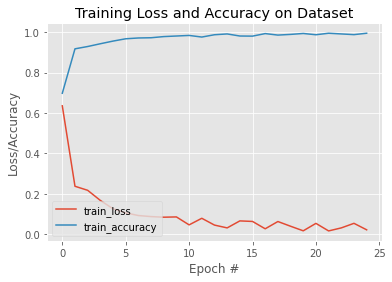

In [15]:
import matplotlib.pyplot as plt

#diagram plot training loss and accuracy

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), H.history["accuracy"], label="train_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

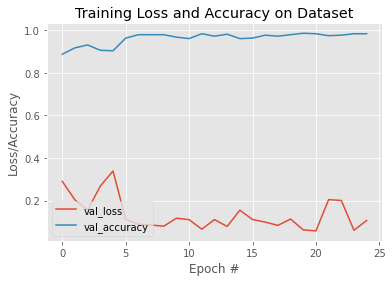

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 25), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

Saving AIdBo3sdoduT52KJ.png to AIdBo3sdoduT52KJ.png
AIdBo3sdoduT52KJ.png
scissors
[[0. 0. 1.]]


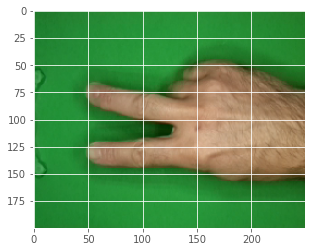

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline 

uploaded = files.upload()

for fn in uploaded.keys():
 
  # proses prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(200,250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)
  
  print(fn)
  if hasil==0:
    print('paper')
  elif hasil==1:
    print('rock')
  else :
    print('scissors')
  print(classes)